In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.
%matplotlib inline

In [5]:
#Importing data
df= pd.read_csv(r'C:\Users\B.Archibong\Downloads\Achievement 6\Data\Prepared\Prepared.csv', index_col= False)

In [6]:
df.shape

(1337, 8)

In [7]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
#data wrangling #dropping column
columns= ['age','bmi','children','charges']

In [18]:
#Creating a subset
Insurance_rec=df[columns]

In [20]:
Insurance_rec.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [8]:
#The elbow technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

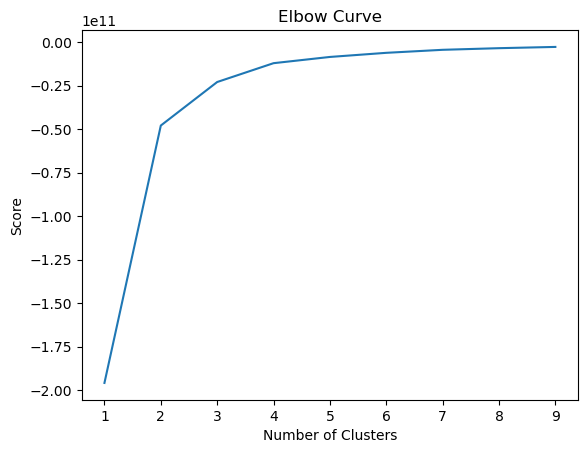

In [23]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [24]:
#K-MEANS CLUSTERING #Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [33]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
random_state=None, tol=0.0001, verbose=0)
      


KMeans(algorithm='auto', n_clusters=3, n_init=10)

In [34]:
#fit the K-means object to the data
kmeans.fit(df)

C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B.Archibong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [36]:
df.head()

,age,bmi,children,charges,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,0


In [37]:
df['clusters'].value_counts()

0    868
2    307
1    162
Name: clusters, dtype: int64

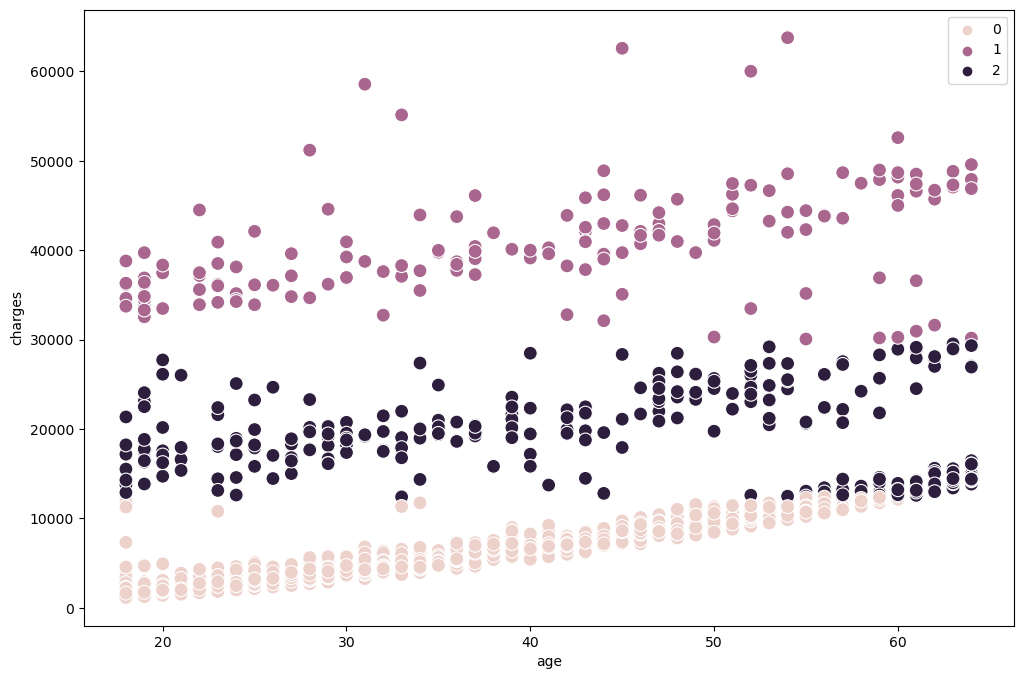

In [41]:
# Plot the clusters for the \"charges\" and \"age\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['charges'], hue=kmeans.labels_, s=100)
#Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

In [ ]:
#comments
#Cluster 2 from the legend gathers data points of age increasing significantly as charges also increase

#Cluster 1 from the legend gathers data points of age increasing moderately as charges as increase with exclusion of extreme values at the top of charges and and bottom of age but higher than average than the 3rd cluster.

#Cluster 0 from the legend shows the lowest charges as individuals get older. 


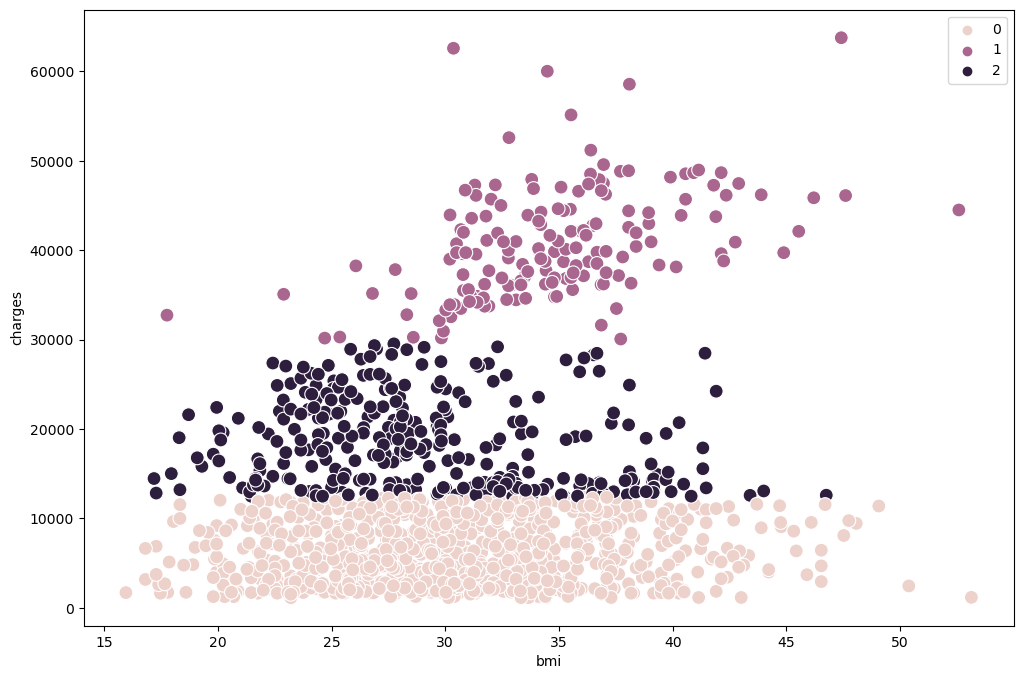

In [42]:
# Plot the clusters for the \"charges\" and \"age\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bmi'], y=df['charges'], hue=kmeans.labels_, s=100)
#Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('bmi') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

In [ ]:
#Comments
#Cluster 2 from the legend shows a cluster of data points of individuals with bmi between 17-42 have charges between 13,000-30,000

#Cluster 1 from the legend shows cluster of data points of individuals with bmi between 17-50 paying significant higher charges of 32,000-60,000 with exclusion of extreme values on top of charges. This cluster represents the highest charges

#Cluster 0 from the legend shows data point with the highest cluster with individuals with all bmi paying the same amount of charges. This cluster also represents the lowest charges

In [43]:
#Conduting a descriptibe statistics for my clusters
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [49]:
df.groupby('cluster').agg({'children':['mean', 'median'],
'bmi':['mean', 'median'],
'age':['mean', 'median'],
'charges':['mean', 'median']})


children               bmi                 age         \
                 mean median       mean   median       mean median   
cluster                                                              
dark purple  1.081433    1.0  29.111498  28.0250  45.563518   49.0   
pink         1.087558    1.0  30.431849  30.1075  36.763825   37.0   
purple       1.166667    1.0  34.845432  34.6500  40.376543   42.0   

                  charges                
                     mean        median  
cluster                                  
dark purple  18505.711805  17904.527050  
pink          6301.382393   6115.362775  
purple       40761.308558  39854.111650

In [ ]:
#comments
#:Dark purple seems to have lower average and median values for the number of children compared to other clusters.

#The median age is progressively higher from the dark purple to the purple cluster.

#The charges for insurance are substantially different across clusters, with the purple cluster having significantly higher charges compared to the others.

#Dark Purple Cluster has the best statistics in most categories, possibly indicating a more favorable demographic or healthier group. It has lower charges, lower average number of children, and relatively lower BMI and age compared to the other clusters.
